In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print('Number of rows of data: ', df.shape[0])
print('Number of columns of data: ', df.shape[1])

Number of rows of data:  506
Number of columns of data:  14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
# Drop all rows that contain missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
CRIM       452 non-null float64
ZN         452 non-null float64
INDUS      452 non-null float64
CHAS       452 non-null float64
NOX        452 non-null float64
RM         452 non-null float64
AGE        452 non-null float64
DIS        452 non-null float64
RAD        452 non-null int64
TAX        452 non-null float64
PTRATIO    452 non-null float64
B          452 non-null float64
LSTAT      452 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [7]:
df.shape

(452, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [9]:
# Correlation
corMat = pd.DataFrame(df.corr())
corMat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


In [10]:
sns.set(style='whitegrid', context='notebook')

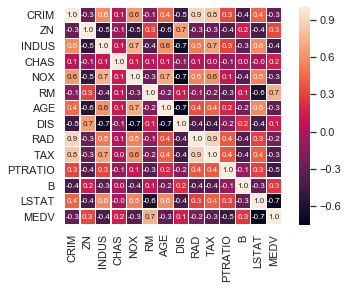

In [11]:
# Heat map
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 linewidths = 0.1,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 8},
                 yticklabels=df.columns,
                 xticklabels=df.columns)

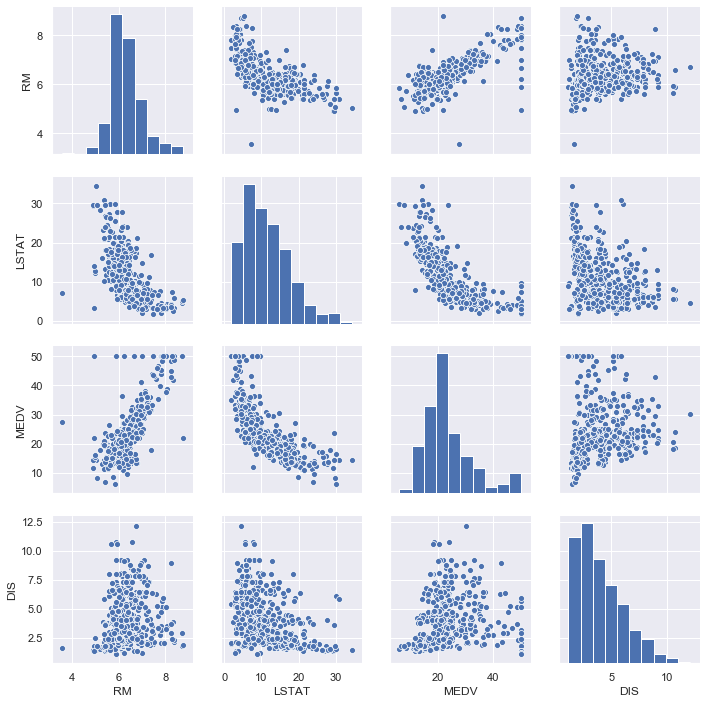

In [12]:
sns.pairplot(df[['RM', 'LSTAT', 'MEDV', 'DIS']])

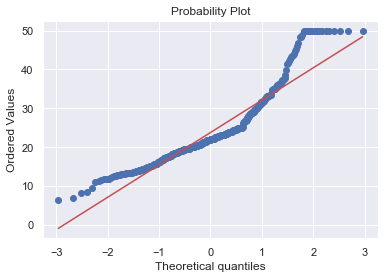

In [13]:
# Q-Q Plot
from scipy import stats
stats.probplot(df.MEDV, dist="norm", plot=plt)
plt.show()

In [14]:
df2 = pd.read_csv('housing2.csv')
df2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 27 columns):
ATT1       452 non-null float64
ATT2       452 non-null float64
ATT3       452 non-null float64
ATT4       452 non-null float64
ATT5       452 non-null float64
ATT6       452 non-null float64
ATT7       452 non-null float64
ATT8       452 non-null float64
ATT9       452 non-null float64
ATT10      452 non-null float64
ATT11      452 non-null float64
ATT12      452 non-null float64
ATT13      452 non-null float64
CRIM       452 non-null float64
ZN         452 non-null float64
INDUS      452 non-null float64
CHAS       452 non-null float64
NOX        452 non-null float64
RM         452 non-null float64
AGE        452 non-null float64
DIS        452 non-null float64
RAD        452 non-null int64
TAX        452 non-null float64
PTRATIO    452 non-null float64
B          452 non-null float64
LSTAT      452 non-null float64
MEDV       452 non-null float64
dtypes: float64(26), int64(1)
mem

In [16]:
normalized_df = df2.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
normalized_df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.037786,0.592684,0.655992,0.119010,0.651985,0.986094,0.204006,0.375417,0.464290,0.333661,...,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.099449,0.405034
1,0.225406,0.983821,0.804625,0.839796,0.159988,0.638404,0.005130,0.632843,0.207795,0.880924,...,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.226744,0.350114
2,0.424599,0.375884,0.271624,0.732664,0.887509,0.043131,0.456105,0.864902,0.904793,0.062284,...,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.070379,0.649886
3,0.746322,0.929764,0.590629,0.646336,0.107091,0.775853,0.304203,0.883114,0.632076,0.929507,...,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.037026,0.620137
4,0.379768,0.787119,0.713643,0.109387,0.762229,0.029463,0.314397,0.668850,0.427221,0.400671,...,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.110159,0.684211


In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df[normalized_df.columns[:-1]], normalized_df[normalized_df.columns[-1]], test_size=.2, random_state=42)
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (361, 26)
Shape of y_train:  (361,)
Shape of X_test:  (91, 26)
Shape of y_test:  (91,)


In [18]:
# Linear Regression
model_0 = LinearRegression().fit(X_train, y_train)
print('coefficient: ', model_0.coef_)
print('intercept: ', model_0.intercept_)
print('training set R2: ', model_0.score(X_train, y_train))
print('training set MSE: ', mean_squared_error(model_0.predict(X_train), y_train))
print('testing set R2: ', model_0.score(X_test, y_test))
print('testing set MSE: ', mean_squared_error(model_0.predict(X_test), y_test))

coefficient:  [ 5.14694023e-02 -6.75412612e-03  1.95934845e-02 -2.72234639e-04
 -6.74562475e-03 -1.92176716e-02 -2.63467423e-03 -1.76168275e-02
 -1.02007702e-02 -1.92137421e-02 -2.94729364e-02  2.62265236e-02
 -3.67755512e-03 -4.60146098e-02  7.80442607e-02  3.12352555e-02
  4.04997855e-02 -1.36007773e-01  6.47522648e-01 -5.17082524e-02
 -3.56123822e-01  1.33917327e-01 -1.19005373e-01 -1.85192755e-01
  1.23569262e-01 -3.43222629e-01]
intercept:  0.3192983738863958
training set R2:  0.7594859722413009
training set MSE:  0.009989495154474823
testing set R2:  0.6782810596985451
testing set MSE:  0.011688213250915165


In [19]:
# LASSO
min_test_mse = 10000
min_test_mse_list = []
for a in [0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    min_test_mse_list.append(mean_squared_error(lasso.predict(X_test), y_test))
    if mean_squared_error(lasso.predict(X_test), y_test) < min_test_mse:
        min_a = a
        min_test_mse = mean_squared_error(lasso.predict(X_test), y_test)
        coef = lasso.coef_
        intercept = lasso.intercept_
        train_R2 = lasso.score(X_train, y_train)
        test_R2 = lasso.score(X_test, y_test)
        train_mse = mean_squared_error(lasso.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Alpha is ', min_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('training set R2: ', train_R2)
print('training set MSE: ', train_mse)
print('testing set R2: ', test_R2)
print('testing set MSE: ', min_test_mse)

Lowest test MSE is  0.01162962008242073
Alpha is  0.0001
coefficient:  [ 0.05000503 -0.00610124  0.01818182 -0.         -0.005902   -0.01757647
 -0.         -0.01616787 -0.00841326 -0.01787259 -0.02827919  0.02497168
 -0.00336955 -0.02992291  0.06976321  0.01780375  0.04077146 -0.12812271
  0.64285337 -0.04772329 -0.3422245   0.1131724  -0.10426426 -0.1828138
  0.121785   -0.34737068]
intercept:  0.3148443292533369
training set R2:  0.7592002447330664
training set MSE:  0.010001362543606375
testing set R2:  0.6798938410255335
testing set MSE:  0.01162962008242073


/Users/zhangxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/zhangxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/zhangxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8031038753827033, tolerance: 0.0014993752274538503
  positive)


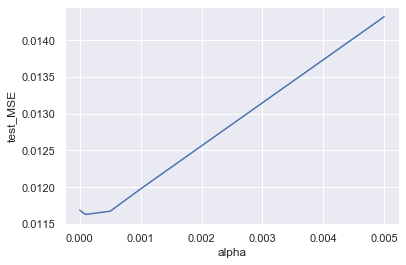

In [20]:
plt.plot([0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005], min_test_mse_list)
plt.xlabel('alpha')
plt.ylabel('test_MSE')
plt.show()

In [21]:
# Ridge
min_test_mse = 10000
min_test_mse_list = []
for a in [0, 0.5, 0.7, 0.9, 0.92, 0.94, 1]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    min_test_mse_list.append(mean_squared_error(ridge.predict(X_test), y_test))
    if mean_squared_error(ridge.predict(X_test), y_test) < min_test_mse:
        min_a = a
        min_test_mse = mean_squared_error(ridge.predict(X_test), y_test)
        coef = ridge.coef_
        intercept = ridge.intercept_
        train_R2 = ridge.score(X_train, y_train)
        test_R2 = ridge.score(X_test, y_test)
        train_mse = mean_squared_error(ridge.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Alpha is ', min_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('training set R2: ', train_R2)
print('training set MSE: ', train_mse)
print('testing set R2: ', test_R2)
print('testing set MSE: ', min_test_mse)

Lowest test MSE is  0.011435901854556025
Alpha is  0.92
coefficient:  [ 0.04713867 -0.01094774  0.01722546 -0.0054113  -0.00659149 -0.01844696
  0.00057501 -0.01608177 -0.00913013 -0.01693047 -0.0279295   0.02681944
 -0.00170808 -0.0286842   0.06296258  0.00450489  0.04639111 -0.11173163
  0.55167905 -0.03355364 -0.2913924   0.10768591 -0.09837323 -0.1876354
  0.11580079 -0.35968986]
intercept:  0.35781810962335314
training set R2:  0.754821875234309
training set MSE:  0.010183213478871647
testing set R2:  0.6852259496761718
testing set MSE:  0.011435901854556025


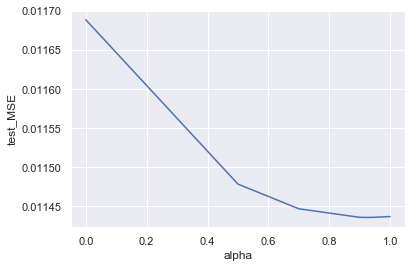

In [22]:
plt.plot([0, 0.5, 0.7, 0.9, 0.92, 0.94, 1], min_test_mse_list)
plt.xlabel('alpha')
plt.ylabel('test_MSE')
plt.show()

In [23]:
print("My name is Xu Zhang")
print("My NetID is: xuz4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xu Zhang
My NetID is: xuz4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
